<a href="https://colab.research.google.com/github/AMAYadav/PROJECTS-/blob/main/Portfolio_5th__feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PACKAGES AND DEPENDENCIES

In [276]:
!pip3 install yfinance --quiet
!pip3 install riskfolio-lib --quiet
!pip3 install quantstats --quiet

In [277]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf
import quantstats as qs
qs.extend_pandas()

# DATA GATHERING

In [278]:
url='https://en.wikipedia.org/wiki/NIFTY_50'
df= pd.read_html(url)

In [279]:
stocks= list(df[1].Symbol)
stocks

['ADANIPORTS',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BHARTIARTL',
 'BPCL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFC',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'ICICIBANK',
 'INDUSINDBK',
 'INFY',
 'IOC',
 'ITC',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'M&M',
 'MARUTI',
 'NESTLEIND',
 'NTPC',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBIN',
 'SBILIFE',
 'SHREECEM',
 'SUNPHARMA',
 'TATAMOTORS',
 'TATASTEEL',
 'TCS',
 'TATACONSUM',
 'TECHM',
 'TITAN',
 'ULTRACEMCO',
 'UPL',
 'WIPRO']

In [280]:
tickers=[i +'.NS' for i in stocks]
tickers.append('^NSEI')

In [281]:
start='2019-04-01';end='2022-02-05'

In [282]:
portfolio=yf.download(tickers,start=start,end=end,progress=False)['Adj Close']

In [283]:
portfolio.isna().count()

ADANIPORTS.NS    706
ASIANPAINT.NS    706
AXISBANK.NS      706
BAJAJ-AUTO.NS    706
BAJAJFINSV.NS    706
BAJFINANCE.NS    706
BHARTIARTL.NS    706
BPCL.NS          706
BRITANNIA.NS     706
CIPLA.NS         706
COALINDIA.NS     706
DIVISLAB.NS      706
DRREDDY.NS       706
EICHERMOT.NS     706
GRASIM.NS        706
HCLTECH.NS       706
HDFC.NS          706
HDFCBANK.NS      706
HDFCLIFE.NS      706
HEROMOTOCO.NS    706
HINDALCO.NS      706
HINDUNILVR.NS    706
ICICIBANK.NS     706
INDUSINDBK.NS    706
INFY.NS          706
IOC.NS           706
ITC.NS           706
JSWSTEEL.NS      706
KOTAKBANK.NS     706
LT.NS            706
M&M.NS           706
MARUTI.NS        706
NESTLEIND.NS     706
NTPC.NS          706
ONGC.NS          706
POWERGRID.NS     706
RELIANCE.NS      706
SBILIFE.NS       706
SBIN.NS          706
SHREECEM.NS      706
SUNPHARMA.NS     706
TATACONSUM.NS    706
TATAMOTORS.NS    706
TATASTEEL.NS     706
TCS.NS           706
TECHM.NS         706
TITAN.NS         706
ULTRACEMCO.NS

In [284]:
portfolio=portfolio.dropna()

In [285]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 704 entries, 2019-04-01 to 2022-02-04
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ADANIPORTS.NS  704 non-null    float64
 1   ASIANPAINT.NS  704 non-null    float64
 2   AXISBANK.NS    704 non-null    float64
 3   BAJAJ-AUTO.NS  704 non-null    float64
 4   BAJAJFINSV.NS  704 non-null    float64
 5   BAJFINANCE.NS  704 non-null    float64
 6   BHARTIARTL.NS  704 non-null    float64
 7   BPCL.NS        704 non-null    float64
 8   BRITANNIA.NS   704 non-null    float64
 9   CIPLA.NS       704 non-null    float64
 10  COALINDIA.NS   704 non-null    float64
 11  DIVISLAB.NS    704 non-null    float64
 12  DRREDDY.NS     704 non-null    float64
 13  EICHERMOT.NS   704 non-null    float64
 14  GRASIM.NS      704 non-null    float64
 15  HCLTECH.NS     704 non-null    float64
 16  HDFC.NS        704 non-null    float64
 17  HDFCBANK.NS    704 non-null    floa

In [310]:
portfolio.describe()[1:]

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,DIVISLAB.NS,DRREDDY.NS,EICHERMOT.NS,GRASIM.NS,HCLTECH.NS,HDFC.NS,HDFCBANK.NS,HDFCLIFE.NS,HEROMOTOCO.NS,HINDALCO.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,IOC.NS,ITC.NS,JSWSTEEL.NS,KOTAKBANK.NS,LT.NS,M&M.NS,MARUTI.NS,NESTLEIND.NS,NTPC.NS,ONGC.NS,POWERGRID.NS,RELIANCE.NS,SBILIFE.NS,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,^NSEI
mean,495.132793,2200.166646,655.327867,3112.587845,9777.699043,4608.436913,510.596754,362.426830,3261.958796,699.754437,139.146912,3040.595534,3996.992352,2193.538709,1025.687714,765.448470,2241.166692,1288.376461,598.111285,2650.335617,265.023571,2136.517306,519.288723,1010.780753,1077.317114,97.370194,207.496693,386.471291,1631.166931,1313.462426,654.858401,6758.181845,15840.903612,98.778778,106.459360,142.796236,1814.100032,907.799170,322.729657,23379.663703,550.258061,498.046568,226.947586,662.844006,2620.957164,890.024842,1432.559261,5245.446857,583.574143,377.269684,13207.070591
std,180.130839,660.048221,132.812403,534.183231,3920.234939,1614.045428,115.575967,54.149644,444.442004,188.393638,26.213560,1220.190437,992.653101,437.310524,409.743765,262.314292,377.105534,209.025297,93.594748,382.931726,120.552679,272.119139,142.413750,355.233594,413.280146,20.516911,29.533935,199.379895,244.564479,317.616564,151.216742,798.062710,2699.186226,17.336159,28.872726,28.597934,447.764065,166.795623,101.490982,3735.311497,147.863336,206.174741,123.786275,378.702424,663.721008,336.420139,461.478397,1475.612571,134.712651,161.481139,2649.158679
min,206.354340,1278.867920,303.149994,1870.850708,4096.256836,1826.049316,311.084198,229.309860,2028.169312,372.644165,92.653175,1489.062378,2453.981689,1260.158813,396.665741,386.824982,1453.542114,764.391724,341.292786,1531.925049,86.851151,1588.885254,283.170868,299.821564,503.908264,61.193302,133.104477,135.136581,1097.704956,680.739136,264.869720,3950.550049,9705.194336,63.894485,52.137363,97.930717,869.675110,537.674194,149.470016,15750.077148,320.232574,193.787735,65.300003,241.925049,1600.641479,457.293121,793.014221,2994.004150,248.522171,161.722519,7610.250000
25%,357.116875,1678.857727,604.962524,2714.751892,7059.225464,3328.771118,427.382195,314.074265,2890.474243,523.125000,117.991789,1807.276886,2842.507202,1822.698792,718.481995,524.480972,1931.269897,1124.243073,535.581924,2384.990479,180.038284,1966.789612,396.043854,830.305786,699.511154,77.122372,186.542553,238.349861,1409.322693,1102.916138,545.432190,6383.415894,14156.581543,84.681839,79.239635,122.245270,1393.811554,795.131073,241.916496,20175.489258,425.479919,304.605042,131.087494,369.811623,2051.450500,660.705139,1116.422729,4063.437866,491.012230,247.275898,11321.212402
50%,394.239380,1945.224121,712.500000,2943.166870,8936.382812,4161.769043,524.075012,371.388992,3423.160522,738.426178,136.258728,3107.561401,4382.788086,2167.405029,853.859558,688.690002,2248.092773,1251.856934,606.360535,2659.807373,202.726776,2135.455566,506.890793,1002.257874,931.766327,100.365417,207.998154,279.758652,1657.351990,1311.864502,625.548004,6905.534912,16395.368164,98.497032,108.749840,131.836510,1931.436646,876.238403,318.880920,22710.899414,500.099075,493.216476,177.225006,462.534744,2279.576050,752.425995,1260.518555,4525.709961,570.619934,295.654602,12055.924805
75%,710.212524,2888.646973,748.299988,3603.037415,11434.539795,5674.668091,568.025024,409.120071,3620.862549,894.612503,156.147614,4057.069275,4835.980713,2579.944580,1442.972961,956.207794,2540.808716,1484.643524,676.715454,2912.793030,378.705093,2339.444946,633.432816,1324.742767,1377.442627,115.770096,224.959866,650.737488,1810.363495,1488.884857,785.805374,7241.783691,17570.202148,108.526621,124.375544,165.585434,2146.299927,993.642700,408.808342,27022.903809,670.633179,669.706116,307.999992,1084.875031,3181.953308

In [286]:
returns=round(portfolio.pct_change().dropna(),4)
returns

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,DIVISLAB.NS,DRREDDY.NS,EICHERMOT.NS,GRASIM.NS,HCLTECH.NS,HDFC.NS,HDFCBANK.NS,HDFCLIFE.NS,HEROMOTOCO.NS,HINDALCO.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,IOC.NS,ITC.NS,JSWSTEEL.NS,KOTAKBANK.NS,LT.NS,M&M.NS,MARUTI.NS,NESTLEIND.NS,NTPC.NS,ONGC.NS,POWERGRID.NS,RELIANCE.NS,SBILIFE.NS,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-02,-0.0087,0.0178,0.0024,-0.0215,0.0169,0.0179,0.0459,-0.0291,-0.0182,-0.0057,0.0000,-0.0141,0.0014,0.0267,-0.0136,-0.0073,0.0185,-0.0073,-0.0094,0.0045,0.0049,-0.0017,-0.0028,0.0181,0.0057,-0.0035,0.0022,-0.0178,0.0000,-0.0017,0.0117,0.0072,-0.0118,0.0004,0.0016,0.0217,-0.0015,0.0049,0.0194,-0.0158,-0.0191,0.0183,0.0833,-0.0084,0.0235,0.0088,-0.0075,-0.0068,-0.0077,0.0000,0.0038
2019-04-03,0.0061,-0.0143,-0.0077,-0.0020,0.0168,-0.0030,-0.0181,-0.0455,-0.0014,-0.0042,-0.0097,-0.0137,-0.0120,-0.0185,-0.0165,0.0163,0.0086,-0.0009,0.0116,0.0041,-0.0046,-0.0097,-0.0127,-0.0005,-0.0080,-0.0297,-0.0059,0.0098,-0.0039,-0.0225,-0.0152,0.0266,0.0201,-0.0026,-0.0130,0.0058,-0.0104,0.0047,-0.0258,0.0058,-0.0164,-0.0168,-0.0079,0.0090,0.0000,-0.0186,-0.0103,-0.0061,-0.0031,0.0000,-0.0059
2019-04-04,-0.0098,0.0143,0.0009,0.0041,-0.0112,-0.0022,0.0194,-0.0245,0.0173,0.0011,0.0030,0.0151,0.0022,0.0142,0.0038,-0.0201,0.0144,-0.0038,-0.0165,0.0220,-0.0255,-0.0025,-0.0085,-0.0211,-0.0072,0.0114,-0.0046,-0.0072,-0.0085,-0.0068,-0.0077,0.0057,-0.0038,0.0063,-0.0013,-0.0080,-0.0161,-0.0120,0.0041,0.0143,0.0078,0.0144,0.0238,-0.0090,-0.0312,-0.0041,0.0051,0.0196,0.0078,-0.0099,-0.0039
2019-04-05,0.0235,-0.0030,0.0001,0.0009,0.0108,0.0246,-0.0004,0.0107,-0.0157,0.0213,-0.0004,0.0106,-0.0061,0.0240,0.0168,-0.0048,0.0084,0.0095,0.0209,-0.0071,0.0235,-0.0045,0.0046,0.0183,0.0152,0.0209,-0.0008,0.0224,0.0099,0.0037,0.0074,-0.0008,0.0017,-0.0063,0.0084,-0.0153,0.0006,0.0293,-0.0148,0.0110,-0.0053,-0.0002,-0.0049,0.0351,0.0168,0.0036,0.0003,0.0271,0.0102,0.0118,0.0059
2019-04-08,-0.0187,-0.0120,-0.0100,-0.0029,-0.0068,-0.0289,-0.0048,-0.0198,-0.0075,-0.0126,-0.0075,-0.0201,0.0034,-0.0175,-0.0100,0.0032,-0.0021,-0.0070,-0.0021,-0.0120,-0.0044,0.0035,-0.0088,-0.0096,0.0105,-0.0404,-0.0061,-0.0131,0.0055,-0.0001,0.0134,0.0031,-0.0119,0.0056,0.0099,0.0104,-0.0182,0.0126,-0.0134,-0.0133,-0.0015,0.0019,-0.0224,-0.0005,0.0110,0.0127,-0.0018,-0.0056,0.0062,0.0061,-0.0053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,0.0087,0.0133,0.0109,0.0193,0.0323,0.0194,0.0189,0.0380,0.0073,0.0137,-0.0114,0.0242,0.0200,0.0132,0.0180,0.0175,0.0018,0.0153,0.0032,0.0195,-0.0027,-0.0043,0.0098,-0.0348,0.0297,0.0089,0.0119,0.0014,-0.0216,0.0061,0.0186,0.0054,0.0075,0.0136,0.0225,0.0247,0.0217,0.0230,0.0284,0.0059,0.0086,0.0131,0.0411,0.0008,0.0125,0.0485,0.0193,0.0150,-0.0174,0.0370,0.0139
2022-02-01,0.0313,0.0140,0.0114,-0.0085,0.0137,0.0020,-0.0086,-0.0458,0.0343,0.0015,0.0203,0.0179,0.0015,-0.0088,0.0254,0.0304,0.0176,0.0076,0.0023,0.0009,0.0449,0.0140,0.0273,0.0576,0.0206,-0.0276,0.0343,0.0403,0.0135,0.0426,-0.0182,-0.0044,0.0081,-0.0063,-0.0096,-0.0114,-0.0033,-0.0148,-0.0111,0.0504,0.0686,0.0121,-0.0260,0.0754,0.0172,0.0181,0.0303,0.0416,0.0109,0.0071,0.0137
2022-02-02,0.0087,0.0005,0.0284,0.0002,0.0504,0.0332,0.0028,0.0086,-0.0097,0.0057,0.0049,0.0271,0.0246,0.0181,0.0038,0.0337,0.0186,0.0228,0.0325,-0.0089,0.0058,0.0097,0.0043,0.0575,0.0085,0.0222,0.0193,0.0085,0.0320,-0.0039,-0.0004,-0.0052,-0.0092,0.0000,0.0020,0.0049,0.0020,0.0042,0.0141,-0.0088,-0.0012,0.0086,0.0042,0.0001,0.0146,-0.0151,0.0132,-0.0100,0.0012,0.0197,0.0116


In [287]:
log_returns=round(np.log(portfolio/portfolio.shift(1)).dropna(),4)
log_returns

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,DIVISLAB.NS,DRREDDY.NS,EICHERMOT.NS,GRASIM.NS,HCLTECH.NS,HDFC.NS,HDFCBANK.NS,HDFCLIFE.NS,HEROMOTOCO.NS,HINDALCO.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,IOC.NS,ITC.NS,JSWSTEEL.NS,KOTAKBANK.NS,LT.NS,M&M.NS,MARUTI.NS,NESTLEIND.NS,NTPC.NS,ONGC.NS,POWERGRID.NS,RELIANCE.NS,SBILIFE.NS,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-02,-0.0088,0.0176,0.0023,-0.0217,0.0167,0.0177,0.0449,-0.0295,-0.0184,-0.0057,0.0000,-0.0142,0.0014,0.0263,-0.0137,-0.0074,0.0184,-0.0074,-0.0094,0.0045,0.0049,-0.0017,-0.0028,0.0179,0.0057,-0.0035,0.0022,-0.0180,0.0000,-0.0017,0.0116,0.0071,-0.0118,0.0004,0.0016,0.0215,-0.0015,0.0049,0.0192,-0.0159,-0.0193,0.0181,0.0800,-0.0084,0.0232,0.0088,-0.0076,-0.0068,-0.0077,0.0000,0.0038
2019-04-03,0.0060,-0.0144,-0.0077,-0.0020,0.0166,-0.0030,-0.0183,-0.0465,-0.0014,-0.0042,-0.0098,-0.0138,-0.0121,-0.0187,-0.0166,0.0162,0.0086,-0.0009,0.0115,0.0041,-0.0046,-0.0097,-0.0128,-0.0005,-0.0081,-0.0302,-0.0059,0.0097,-0.0039,-0.0227,-0.0153,0.0262,0.0199,-0.0026,-0.0131,0.0057,-0.0105,0.0047,-0.0262,0.0058,-0.0165,-0.0169,-0.0079,0.0090,0.0000,-0.0188,-0.0103,-0.0061,-0.0031,0.0000,-0.0059
2019-04-04,-0.0099,0.0142,0.0009,0.0041,-0.0113,-0.0022,0.0192,-0.0248,0.0171,0.0011,0.0030,0.0150,0.0022,0.0141,0.0038,-0.0203,0.0143,-0.0038,-0.0166,0.0218,-0.0258,-0.0025,-0.0086,-0.0213,-0.0072,0.0113,-0.0046,-0.0073,-0.0085,-0.0068,-0.0078,0.0057,-0.0038,0.0063,-0.0013,-0.0080,-0.0162,-0.0121,0.0040,0.0142,0.0078,0.0143,0.0236,-0.0090,-0.0317,-0.0041,0.0051,0.0194,0.0078,-0.0100,-0.0040
2019-04-05,0.0233,-0.0030,0.0001,0.0009,0.0108,0.0243,-0.0004,0.0107,-0.0158,0.0211,-0.0004,0.0105,-0.0062,0.0237,0.0167,-0.0048,0.0084,0.0094,0.0207,-0.0072,0.0232,-0.0045,0.0046,0.0182,0.0151,0.0207,-0.0008,0.0222,0.0098,0.0037,0.0074,-0.0008,0.0017,-0.0063,0.0083,-0.0154,0.0006,0.0288,-0.0149,0.0109,-0.0053,-0.0002,-0.0049,0.0345,0.0166,0.0035,0.0003,0.0267,0.0101,0.0117,0.0058
2019-04-08,-0.0189,-0.0120,-0.0100,-0.0029,-0.0069,-0.0294,-0.0048,-0.0200,-0.0076,-0.0127,-0.0075,-0.0203,0.0034,-0.0177,-0.0101,0.0032,-0.0021,-0.0071,-0.0021,-0.0121,-0.0044,0.0035,-0.0089,-0.0096,0.0104,-0.0412,-0.0061,-0.0132,0.0054,-0.0001,0.0133,0.0031,-0.0119,0.0055,0.0099,0.0104,-0.0184,0.0125,-0.0135,-0.0134,-0.0015,0.0019,-0.0227,-0.0005,0.0109,0.0127,-0.0018,-0.0056,0.0061,0.0061,-0.0053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,0.0086,0.0132,0.0109,0.0191,0.0318,0.0192,0.0187,0.0373,0.0073,0.0136,-0.0115,0.0239,0.0198,0.0131,0.0178,0.0174,0.0018,0.0152,0.0032,0.0193,-0.0027,-0.0043,0.0097,-0.0354,0.0292,0.0088,0.0119,0.0014,-0.0219,0.0061,0.0184,0.0054,0.0074,0.0135,0.0223,0.0244,0.0215,0.0227,0.0280,0.0059,0.0086,0.0130,0.0403,0.0008,0.0124,0.0473,0.0191,0.0149,-0.0176,0.0364,0.0138
2022-02-01,0.0309,0.0139,0.0114,-0.0085,0.0136,0.0020,-0.0086,-0.0469,0.0337,0.0015,0.0201,0.0177,0.0015,-0.0088,0.0251,0.0299,0.0174,0.0076,0.0023,0.0009,0.0439,0.0139,0.0269,0.0560,0.0204,-0.0279,0.0337,0.0395,0.0134,0.0417,-0.0183,-0.0044,0.0081,-0.0064,-0.0096,-0.0114,-0.0033,-0.0150,-0.0112,0.0492,0.0664,0.0120,-0.0263,0.0726,0.0171,0.0179,0.0298,0.0407,0.0109,0.0070,0.0136
2022-02-02,0.0087,0.0005,0.0280,0.0002,0.0492,0.0327,0.0028,0.0085,-0.0098,0.0057,0.0049,0.0267,0.0243,0.0180,0.0038,0.0331,0.0184,0.0226,0.0319,-0.0090,0.0058,0.0096,0.0042,0.0559,0.0085,0.0219,0.0191,0.0084,0.0315,-0.0039,-0.0004,-0.0052,-0.0092,0.0000,0.0020,0.0049,0.0020,0.0042,0.0140,-0.0088,-0.0012,0.0086,0.0042,0.0001,0.0145,-0.0153,0.0132,-0.0101,0.0012,0.0195,0.0115


In [288]:
import riskfolio as rp

port = rp.Portfolio(returns=log_returns)

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.


port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)



model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,DIVISLAB.NS,DRREDDY.NS,EICHERMOT.NS,GRASIM.NS,HCLTECH.NS,HDFC.NS,HDFCBANK.NS,HDFCLIFE.NS,HEROMOTOCO.NS,HINDALCO.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,IOC.NS,ITC.NS,JSWSTEEL.NS,KOTAKBANK.NS,LT.NS,M&M.NS,MARUTI.NS,NESTLEIND.NS,NTPC.NS,ONGC.NS,POWERGRID.NS,RELIANCE.NS,SBILIFE.NS,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,^NSEI
weights,2.130459e-08,0.118597,6.114982e-09,1.667279e-08,2.221626e-08,1.969803e-08,0.065553,9.904390e-09,1.352121e-08,0.023929,9.171726e-09,0.198115,4.924338e-08,1.595119e-08,1.984016e-08,1.451781e-07,1.153835e-08,1.485240e-08,1.799894e-08,1.034416e-08,1.852175e-08,2.425414e-08,2.052363e-08,3.629346e-09,0.128885,1.034516e-08,9.360376e-09,2.142035e-08,1.428030e-08,1.459401e-08,1.101549e-08,9.513718e-09,1.148311e-07,1.406196e-08,1.099140e-08,0.038083,2.072077e-08,0.007264,1.337481e-08,1.242744e-08,5.474427e-08,0.279738,2.128147e-08,2.786923e-08,0.028691,2.800732e-08,0.024975,2.172120e-08,9.876517e-09,0.086169,1.516034e-08


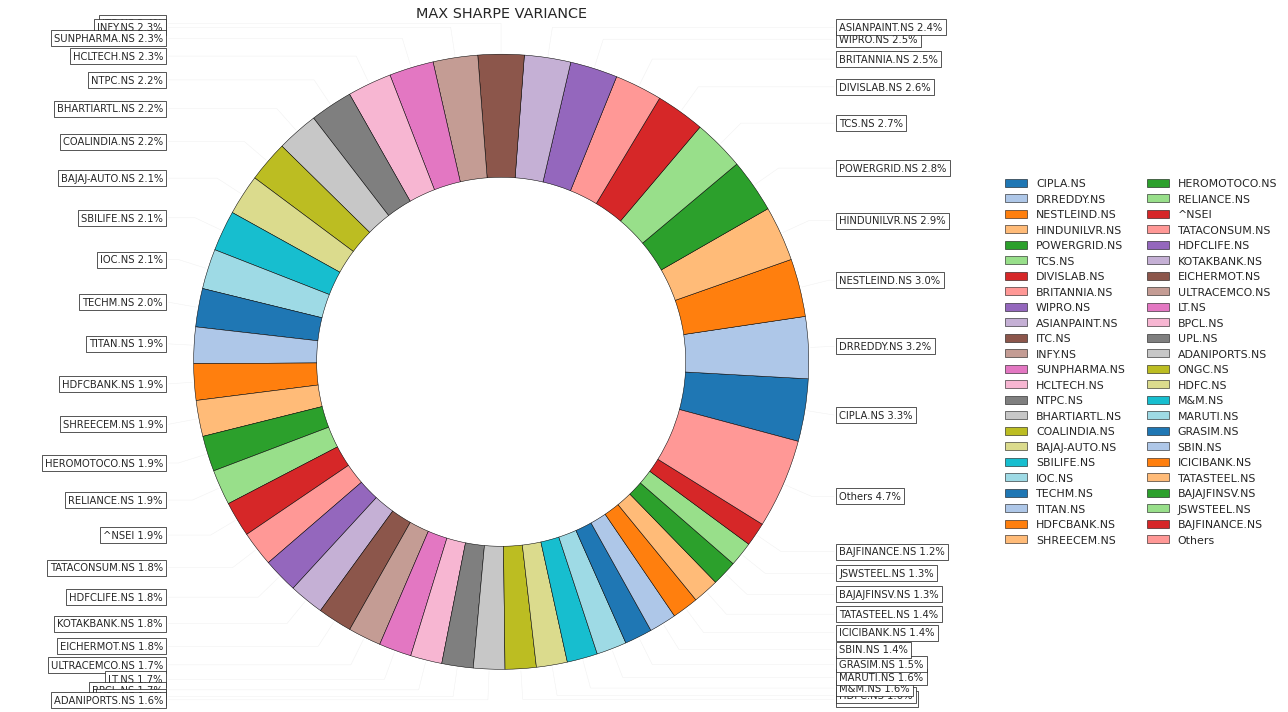

In [289]:
# Plotting portfolio composition¶
ax = rp.plot_pie(w=w_rp, title='MAX SHARPE VARIANCE', others=0.05, nrow=25, cmap = "tab20",
                 height=10, width=18, ax=None,)

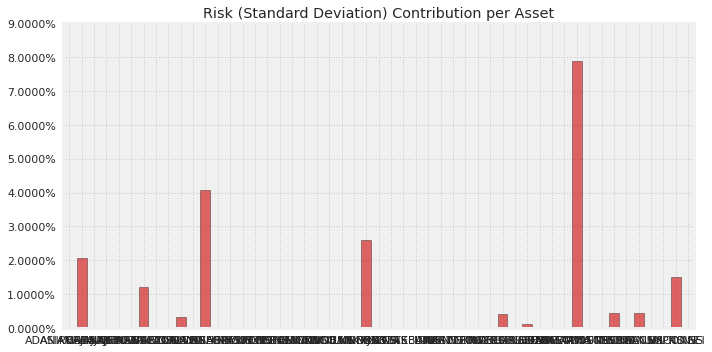

In [290]:
ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:red", height=5, width=10, ax=None)

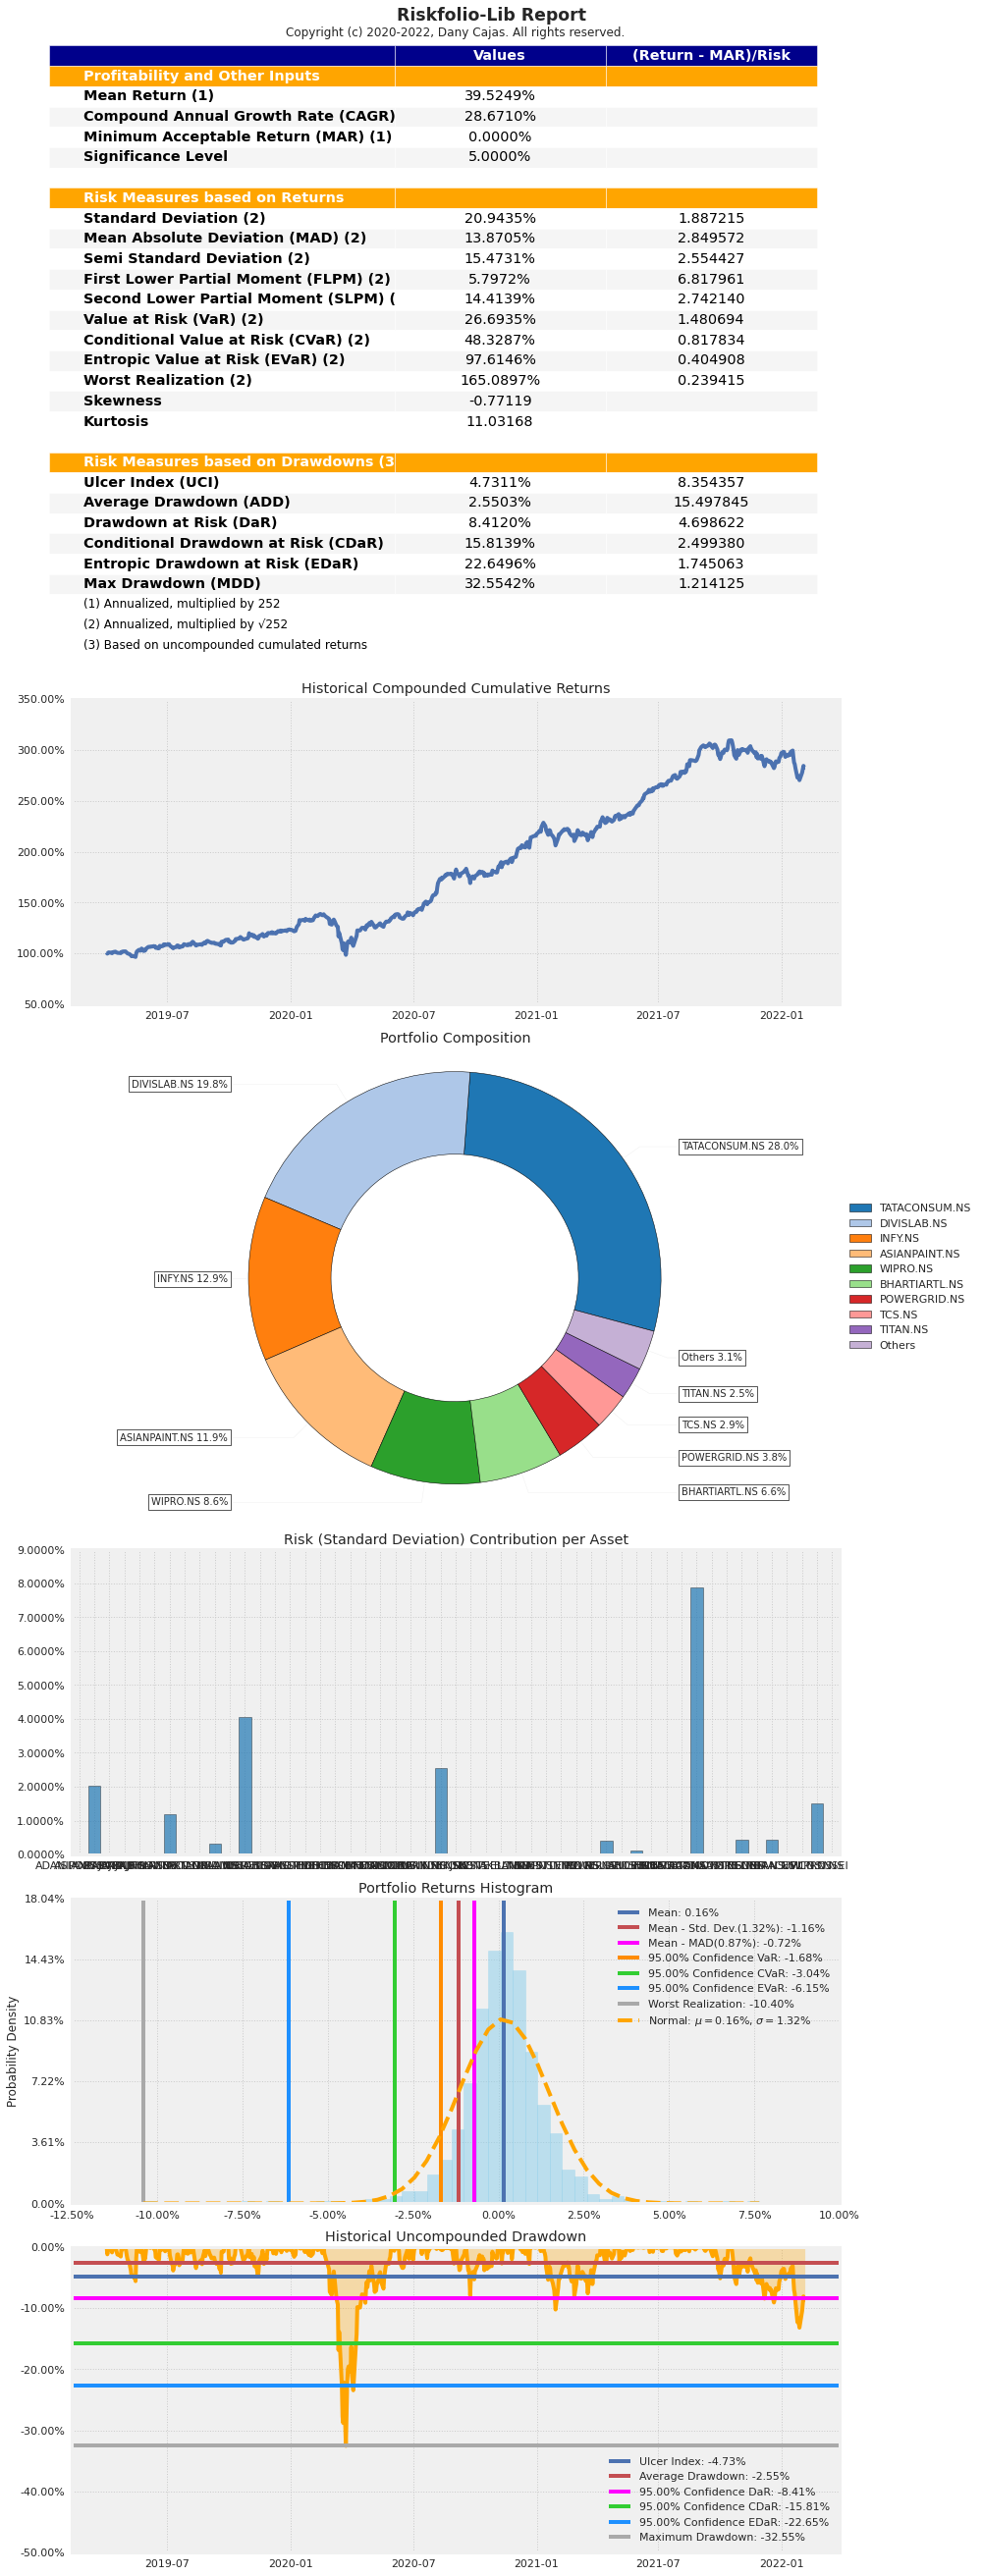

In [291]:
ax = rp.jupyter_report(returns, w, rm='MV', rf=0, alpha=0.05, height=6, width=14,
                       others=0.05, nrow=25)

In [292]:
# w.plot.bar(figsize=(10,5))
### GETTING AN EXCEL FILE
rp.excel_report(returns, w,
                # MAR=0,
                alpha=0.05, name='report',
                # files=None
                )

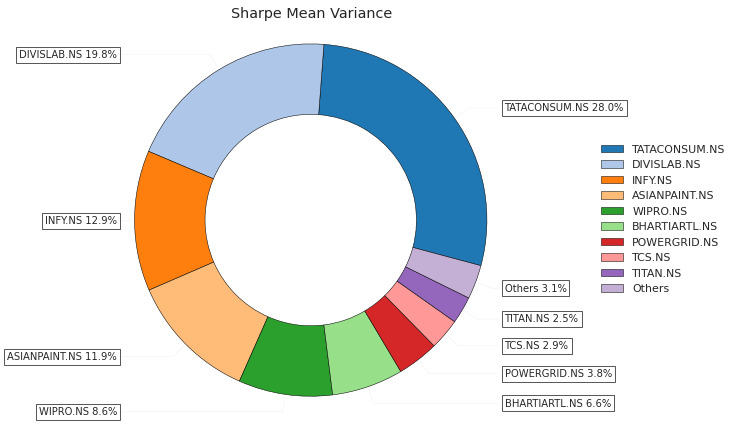

In [293]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [294]:
w=w.round(6)
refinded_weights = w[w!=0].dropna()
dict(refinded_weights)
f={
'ASIANPAINT.NS':    0.118578,
 'BHARTIARTL.NS'  :  0.065539,
 'CIPLA.NS'        : 0.023919,
 'DIVISLAB.NS'  :    0.198104,
 'INFY.NS'       :   0.128886,
 'POWERGRID.NS'   :  0.038086,
 'SBILIFE.NS'      : 0.007241,
 'TATACONSUM.NS' :   0.279720,
 'TCS.NS'      :     0.028870,
 'TITAN.NS'      :   0.024965,
 'WIPRO.NS'       :  0.086091}
colab=qs.utils.make_index(f,returns=log_returns,match_dates=True)

In [295]:
qs.reports.html(colab,output='file1.html')

#Parcing the industry lists


In [296]:
# import requests
# from bs4 import BeautifulSoup

In [297]:
# webpage=requests.get('https://indiainvestmentgrid.gov.in/sectors').text

In [298]:
# soup=BeautifulSoup(webpage,'lxml')

In [299]:
# print(soup.prettify())

In [300]:
# industry=soup.find_all('h3')

In [301]:
# industry

In [302]:
# sector=[]

# for i in industry:
#   sector.append(i.text.strip())

In [303]:
# len(sector)

In [304]:
# sector


# df=pd.DataFrame({'Various Sectors':sector,
#     })

In [305]:
# df

# df = df.drop(labels=0, axis=0)

In [306]:
# df=df.style.set_properties(**{'text-align': 'left'})

In [307]:
# df

In [308]:
# NIFTY AUTO (^CNXAUTO)
# NIFTY ENERGY (^CNXENERGY) 
# NIFTY FMCG (^CNXFMCG) - Food Processing & Agriculture
# NIFTY IT (^CNXIT) - information technology
# 